In [1]:
! pip install -q pandas seaborn plotly

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as pe

In [3]:
df = pd.read_csv('Dataset salary 2024.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [7]:
df.shape

(16534, 11)

In [8]:
work_l = df['work_year'].value_counts()
fig = pe.pie(work_l, names=work_l.index, values=work_l.values, title='Work Year')
fig.show()

In [9]:
experience_l = df['experience_level'].value_counts()
fig = pe.pie(experience_l, names=experience_l.index, values=experience_l.values, title='Experience Level')
fig.show()

In [10]:
employment_l = df['employment_type'].value_counts()
fig = pe.bar(employment_l, x=employment_l.index, y=employment_l.values, title='Employment Type')
fig.show()

In [11]:
title_j = df['job_title'].value_counts()[:20]
fig = pe.pie(title_j, names=title_j.index, values=title_j.values, title='Job Title')
fig.show()

In [12]:
company_j = df['company_location'].value_counts()[:10]
fig = pe.pie(company_j, names=company_j.index, values=company_j.values, title='Company Location')
fig.show()

In [13]:
remote_r = df['remote_ratio'].value_counts()
fig = pe.pie(remote_r, names=remote_r.index, values=remote_r.values, title='Remote Ratio')
fig.show()

In [14]:
remote_df = df[df['remote_ratio']!=0]

In [15]:
def mean_salary(role,country):
    return round(np.mean(df.query(f"job_title== '{role}' and company_location == '{country}'")['salary_in_usd']),2)

In [16]:
mean_salary('ML Engineer','US')

199321.81

In [17]:
def check_salary(df):
    result = df.groupby(['job_title', 'company_location'])['salary_in_usd'].sum().reset_index()[:25]
    # sns.boxplot(x='job_title', y='salary_in_usd', data=df)
    return result.sort_values('salary_in_usd', ascending=False)


## Highest average job title with its locations

In [18]:
check_salary(df)

,job_title,company_location,salary_in_usd
22,AI Engineer,US,17456123
1,AI Architect,US,6523986
10,AI Developer,US,1276000
15,AI Engineer,GB,932300
0,AI Architect,CA,800000
12,AI Engineer,CA,357800
24,AI Product Manager,US,305300
20,AI Engineer,QA,300000
4,AI Developer,DE,280717
3,AI Developer,CA,275000


In [19]:
check_salary(remote_df)

,job_title,company_location,salary_in_usd
17,AI Engineer,US,3116550
1,AI Architect,US,1693936
0,AI Architect,CA,800000
8,AI Developer,US,470000
16,AI Engineer,QA,300000
12,AI Engineer,GB,262500
3,AI Developer,DE,215936
4,AI Developer,FR,195285
21,AI Programmer,FR,120000
18,AI Product Manager,IN,120000


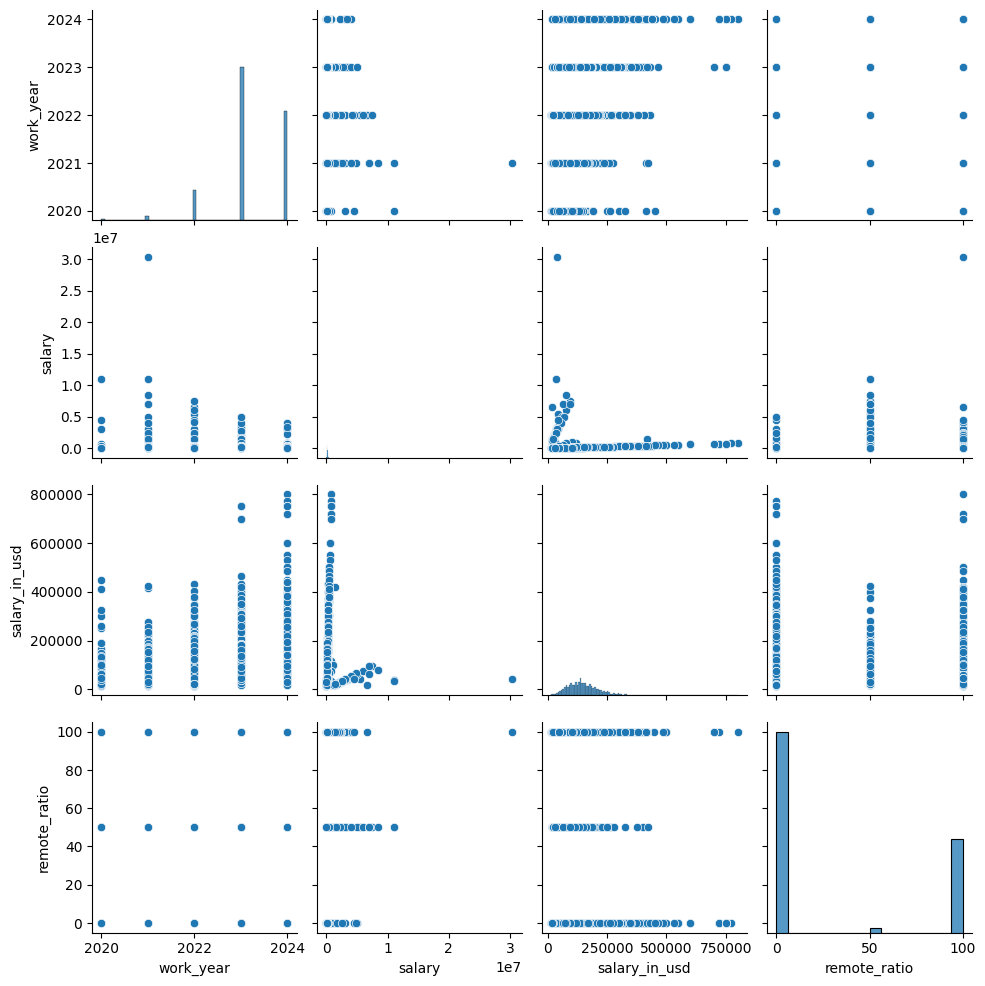

In [20]:
sns.pairplot(df)

<Axes: >

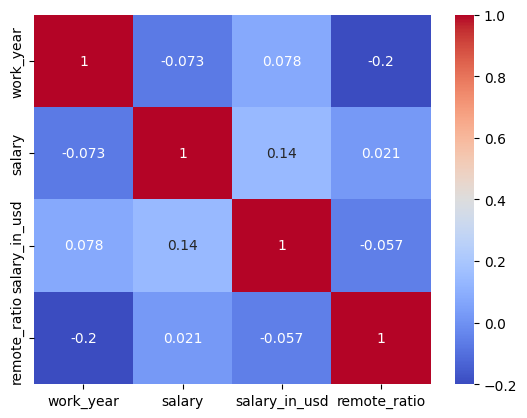

In [21]:
num_col = df.select_dtypes(include=np.number).columns
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm')